# Milestone 02
# Aeden Jameson

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

# Milestone 01 Work

## Problem

Identify the most important features in the diaper manufacturing process that result in the production of the desired quality of diaper.

## Step 1: Refine your data understanding and prepare a DFD of solving the manufacturing quality problem

Didn't give myself enough time to get to this.

## Step 2: Read & Merge Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import requests
import re

def prepare(dataFilename = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data", labelsFilename="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"):
    names = ["f" + str(x) for x in range(1, 591)]
    
    data = pd.read_csv(dataFilename, names=names, delimiter=' ', header=None)    
    labels = pd.read_csv(labelsFilename, delimiter=' ', header=None, names = ["class","date"], parse_dates = ["date"])
    
    merged = pd.merge(data, labels,left_index=True,right_index=True)
    
    return merged

secom_raw = prepare()
print('Read & Merged ...')

Read & Merged ...


In [3]:
secom_raw.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f583,f584,f585,f586,f587,f588,f589,f590,class,date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


## Step 3: Clean and Prepare Data 

#### Drop Date Column

The date column isn't relevant to our analysis

In [4]:
secom_raw.drop(columns=['date'], axis=1, inplace = True)

#### Drop Columns w/ > 40% Missing Data

In [5]:
cols_with_missing = secom_raw.columns[(secom_raw.isnull().sum() /  secom_raw.shape[0]) > .4]
secom_raw.drop(columns=cols_with_missing, axis=1, inplace = True)

#### Drop Columns w/ One Value

In [6]:
const_cols = [] # data.columns[data.value_counts().count() == 1]
nFeatures = secom_raw.columns.size - 1
for c in secom_raw.columns:
    if secom_raw[c].value_counts().count() <= 1:
        const_cols.append(c)

secom_raw.drop(columns=const_cols, axis=1, inplace = True)   

#### Impute Numeric Columns w/ Mean

In [7]:
secom = secom_raw.fillna(secom_raw.mean())

## Step 4: Visually Explore Data

#### Distributional Observations

Done Generating Plot...Wait for Rendering...


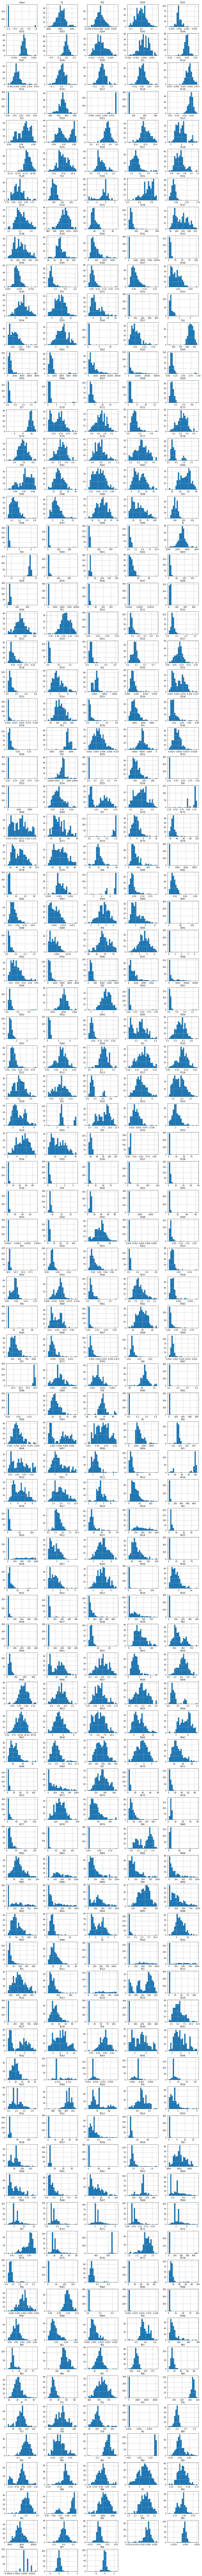

In [8]:
secom.sample(n=300).hist(bins=22,figsize=(18, 250),layout=(90,5));
print('Done Generating Plot...Wait for Rendering...')

#### Observations

* There are numberous variables that have close to a normal distribution, which can make for good features.
* There are distributions that skew left or right that can be transformed to provide better potential
* There are several multi-modal distributions
* Most of the rest of the variables have distributions with near 0 variance, but that's not necessarily cause
  to drop them because they may have everything to do with the failures of which there is very few.

#### Relationships

Now let's take an even closer look at potential relationships between our taget and our feature variables using box plots.

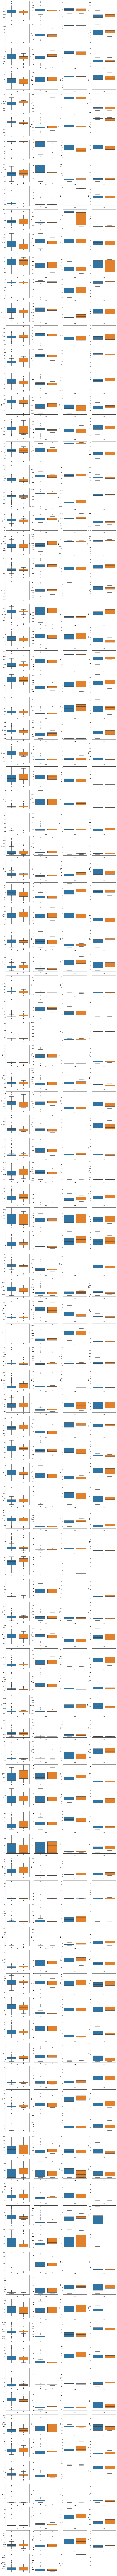

In [9]:
fig, ax = plt.subplots(111, 4, figsize=(25, 600))
for var, subplot in zip(secom.columns, ax.flatten()):
    sns.boxplot(x='class', y=var, data=secom.sample(300), ax=subplot)

#### Observations

I don't see any knockdown candidates for features because the IQR in the box plots above all overlap to a degree. There are some features like f546 or f456 where the median or passing or failing doesn't appear to overlap with the IQR of the other, but further statistical tests would need to be applied to determine significance.

## Step 5: Handle Class Imbalance Problem

In [10]:
!pip install imblearn

#### Is There a Problem?

In [11]:
secom['class'].value_counts()

-1    1463
 1     104
Name: class, dtype: int64

We can see from the counts above that there are far more passes than failures and so have a class imbalance problem.

#### SMOTE The Training Data

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

X_train, X_test, y_train, y_test = train_test_split(secom.drop(columns = 'class'), 
                                                    secom['class'], 
                                                    test_size = 0.20, 
                                                    random_state = 42)

sm = SMOTE(random_state = 42)
X_res_train, y_res_train = sm.fit_sample(X_train, y_train)
print('Done Smoting...')

Done Smoting...


## Step 6: Apply feature selection techniques to reduce dimensionality of data

### Pearson's Correlation Coefficient

In [13]:
merged = pd.merge(X_res_train,y_res_train,left_index=True,right_index=True)

corrs = merged.corr(method = 'pearson').round(4)
corrs = corrs.sort_values(by=['class'], ascending=False)
corrs['class'].head(20)

class    1.0000
f104     0.3415
f60      0.3294
f130     0.2558
f511     0.2533
f349     0.2101
f65      0.2084
f80      0.2066
f131     0.1971
f64      0.1890
f461     0.1799
f66      0.1690
f125     0.1685
f189     0.1682
f432     0.1632
f211     0.1619
f161     0.1583
f164     0.1567
f296     0.1557
f176     0.1546
Name: class, dtype: float64

It looks like Pearson's Correlation Coefficient is going to be a dead end because the highest value the correlates positively is pretty low.

#### Backward Selection

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_res_train = sc.fit_transform(X_res_train)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split


est = LogisticRegression(max_iter=200)
rfecv = RFECV(estimator=est, step=1, scoring='neg_mean_squared_error')
rfecv.fit(X_res_train, y_res_train)        

print('Done Regressing...')

Done Regressing...


Optimal number of features : 158


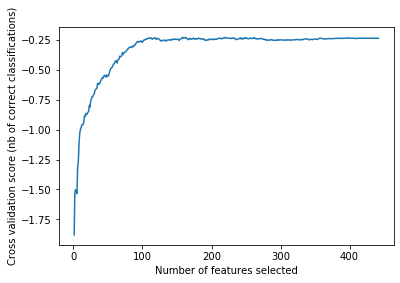

In [26]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Selected Features

In [27]:
secom.drop(columns = 'class').columns[rfecv.support_]

Index(['f1', 'f7', 'f20', 'f23', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31',
       ...
       'f544', 'f561', 'f562', 'f563', 'f564', 'f568', 'f574', 'f576', 'f588',
       'f589'],
      dtype='object', length=158)

#### Compare Predections

In [28]:
yhat_backward = rfecv.predict(X_test)
est = est.fit(X_res_train, y_res_train)
yhat_estimator = est.predict(X_test)
np.corrcoef([yhat_backward, yhat_estimator, y_test])

array([[1.00000000e+00, 4.64525797e-01, 4.74016346e-02],
       [4.64525797e-01, 1.00000000e+00, 5.54079974e-04],
       [4.74016346e-02, 5.54079974e-04, 1.00000000e+00]])

In [32]:
!pip install pyearth

ERROR: Could not find a version that satisfies the requirement pyearth (from versions: none)
ERROR: No matching distribution found for pyearth


### Forward Selection

In [33]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 1.7 MB/s eta 0:00:01


In [35]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

est = LogisticRegression()

stepwise_selector = SFS(est, 
    k_features = "parsimonious", 
    forward = True, 
    floating = False, 
    scoring = 'neg_mean_squared_error', 
    verbose=2,
    n_jobs=-1,
    cv = 5)

stepwise_selector = stepwise_selector.fit(X_res_train, y_res_train)
print("Forward Selection Done ....")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 442 out of 442 | elapsed:    2.6s finished

[2020-06-22 01:58:50] Features: 1/442 -- score: -1.1713650592024678[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    2.1s finished

[2020-06-22 01:58:52] Features: 2/442 -- score: -0.9786907408247517[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:    2.1s finished

[2020-06-22 01:58:54] Features: 3/442 -- score: -0.9412040103434196[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 439

Forward Selection Done ....



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

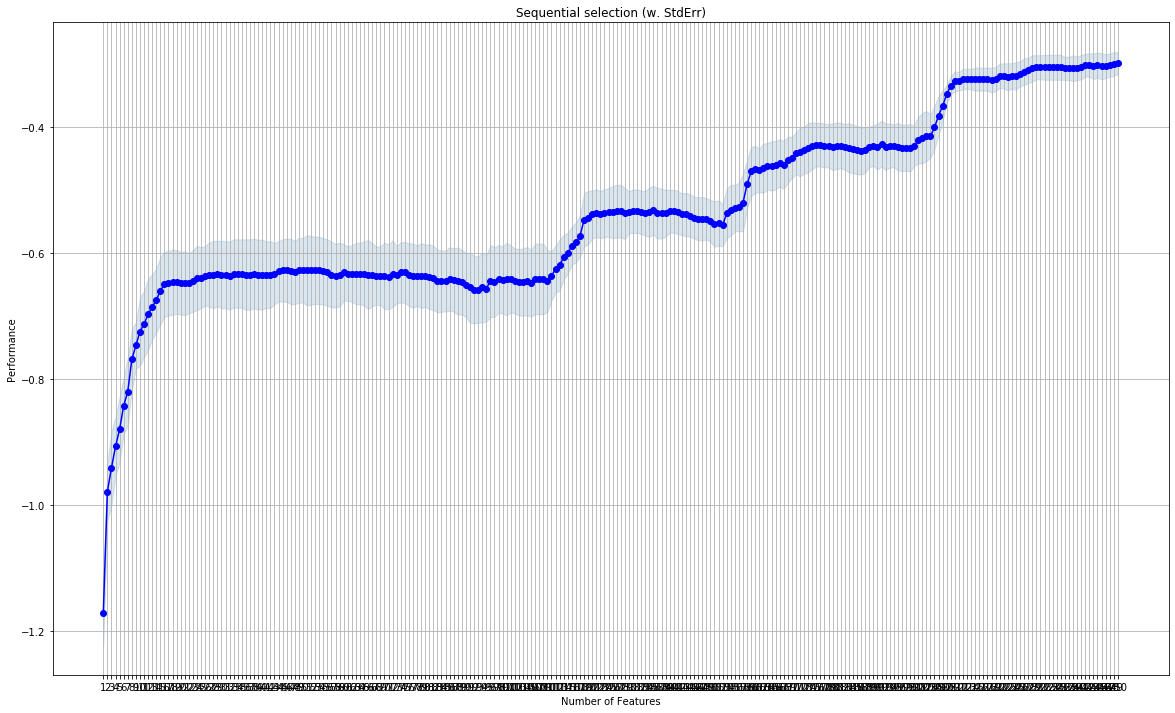

In [36]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(stepwise_selector.get_metric_dict(), kind = 'std_err',figsize=(20, 12))
plt.title('Sequential selection (w. StdErr)')
plt.grid()
plt.show()

In [22]:
stepwise_selector.get_metric_dict()

{1: {'feature_idx': (54,),
  'cv_scores': array([-1.14893617, -1.36460554, -1.1684435 , -1.07462687, -1.10021322]),
  'avg_score': -1.1713650592024678,
  'feature_names': ('54',),
  'ci_bound': 0.13141977119158374,
  'std_dev': 0.10224904674861748,
  'std_err': 0.051124523374308735},
 2: {'feature_idx': (54, 59),
  'cv_scores': array([-0.97021277, -1.06609808, -1.08315565, -0.82729211, -0.9466951 ]),
  'avg_score': -0.9786907408247517,
  'feature_names': ('54', '59'),
  'ci_bound': 0.11859565741542262,
  'std_dev': 0.09227145055347008,
  'std_err': 0.04613572527673504},
 3: {'feature_idx': (54, 59, 90),
  'cv_scores': array([-0.87659574, -1.11727079, -1.04051173, -0.80170576, -0.86993603]),
  'avg_score': -0.9412040103434196,
  'feature_names': ('54', '59', '90'),
  'ci_bound': 0.15161492184695297,
  'std_dev': 0.11796156005413799,
  'std_err': 0.058980780027068996},
 4: {'feature_idx': (54, 59, 65, 90),
  'cv_scores': array([-0.82553191, -1.04051173, -0.9978678 , -0.82729211, -0.84434

In [38]:
len(stepwise_selector.k_feature_idx_)

230

In [39]:
stepwise_selector.k_feature_names_

('0',
 '2',
 '3',
 '4',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '14',
 '19',
 '20',
 '21',
 '22',
 '24',
 '25',
 '26',
 '27',
 '29',
 '30',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '39',
 '47',
 '48',
 '49',
 '52',
 '54',
 '56',
 '57',
 '58',
 '59',
 '60',
 '62',
 '63',
 '65',
 '66',
 '73',
 '75',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '87',
 '88',
 '90',
 '91',
 '92',
 '93',
 '95',
 '96',
 '97',
 '98',
 '100',
 '101',
 '102',
 '104',
 '105',
 '107',
 '109',
 '110',
 '112',
 '114',
 '115',
 '117',
 '118',
 '120',
 '121',
 '122',
 '126',
 '131',
 '132',
 '133',
 '135',
 '136',
 '137',
 '138',
 '139',
 '141',
 '143',
 '144',
 '146',
 '151',
 '153',
 '162',
 '165',
 '169',
 '172',
 '177',
 '178',
 '179',
 '180',
 '182',
 '183',
 '185',
 '186',
 '188',
 '189',
 '194',
 '195',
 '196',
 '197',
 '199',
 '202',
 '204',
 '205',
 '206',
 '207',
 '208',
 '211',
 '213',
 '214',
 '218',
 '220',
 '223',
 '224',
 '225',
 '227',
 '228',
 '229',
 '231',
 '232',
 '233',
 '235',
 '236',
 '238

#### Lasso Regression

In [36]:
from sklearn import linear_model

alpha = 0.01 # increasing alpha can shrink more variable coefficients down to 0
clf = linear_model.Lasso(alpha = alpha, max_iter=2000)
clf.fit(X_res_train, y_res_train);
print('Done Fitting...')

Done Fitting...


In [42]:
print(clf.coef_)

[-7.24548330e-03 -3.93247076e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.78757867e-02  0.00000000e+00 -2.30362437e-04
 -6.86704434e-03 -2.04622530e-02 -6.50449378e-02 -0.00000000e+00
 -3.70419839e-02 -0.00000000e+00  0.00000000e+00  3.93780272e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.32777499e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.78001896e-02 -0.00000000e+00  2.64631680e-03
 -0.00000000e+00 -4.35183507e-02  5.95892333e-02  4.97716173e-02
 -0.00000000e+00 -1.21394688e-02  3.32627328e-03  1.20519174e-02
 -4.25281434e-02 -2.85486553e-02 -5.20736916e-02 -9.35027454e-03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.12416887e-02 -0.00000000e+00
 -6.43739241e-02 -0.00000000e+00  6.84137262e-03  1.05471049e-01
 -0.00000000e+00  0.00000000e+00  3.80438785e-01  8.32391637e-02
  0.00000000e+00 -1.17916529e-01  0.00000000e+00  2.33405851e-01
 -0.00000000e+00  0.00000

In [43]:
print(clf.intercept_)

1.85388039552628e-15


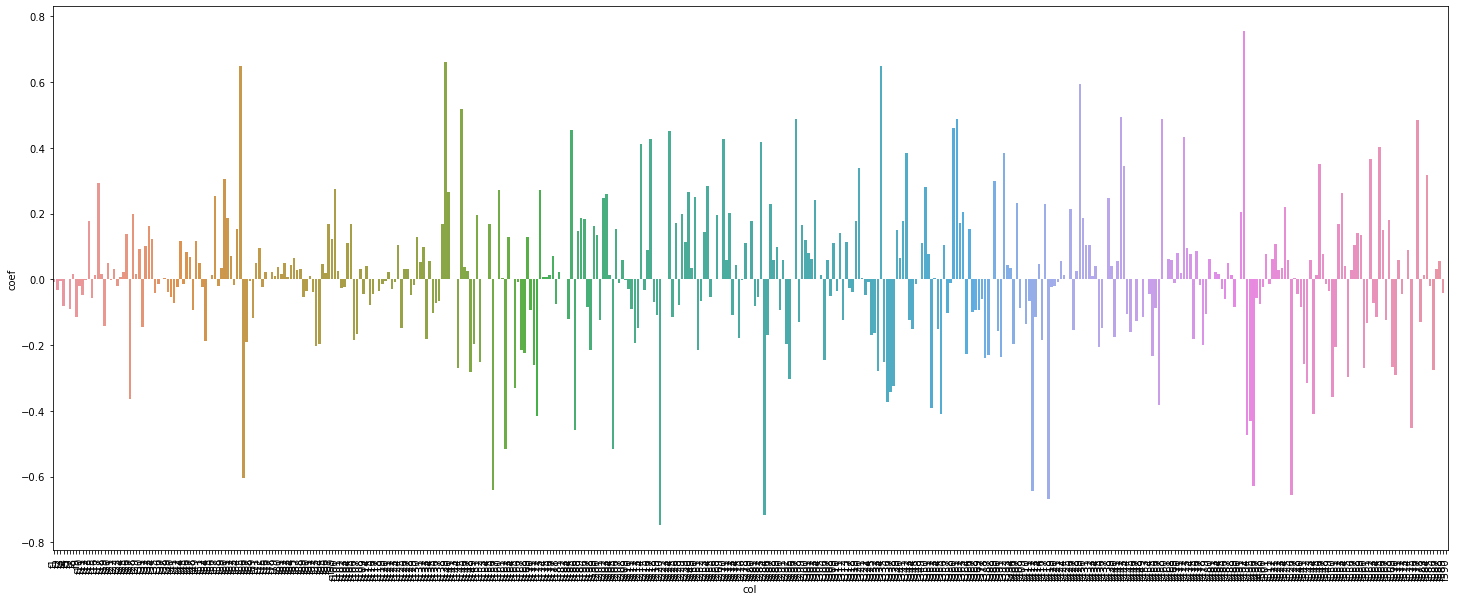

In [47]:
X_res_train = pd.DataFrame(X_res_train, columns=X_train.columns)

dd = pd.DataFrame({'col': X_res_train.columns, 'coef': clf.coef_})
plt.figure(figsize=(25,10))
ax = sns.barplot(x = 'col', y = 'coef', data = dd)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [49]:
results = pd.DataFrame(columns = ['alpha', 'col', 'coef'])
for alpha in np.arange(0.0001, 5, .01):
    clf = linear_model.Lasso(alpha = alpha, max_iter = 10000)
    clf.fit(X_res_train, y_res_train)
    dd = pd.DataFrame({'col': X_res_train.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    results = results.append(dd, sort = False)
    
print('Done Lassoing....')

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.93422420062512, tolerance: 0.2346
  positive)


Done Lassoing....


In [ ]:
results.head()

## What are your initial findings? Describe them in a summary section

* Pearson's Correlation Coefficient was not effective in selecting features.
* Back Selection using logistic regression as our estimator recommends 158 features.
* Forward Selection just would not finish running.... so I'm not sure.
* Forward Selection didn't finish so I couldn't get to Lasso. Next time.

# Milestone 02 Work

## Step 1: Split Prepared Data into Training & Testing

These are the features from our backwards selector. It's the only one I could get to work.

In [53]:
secom.drop(columns = 'class').columns[rfecv.support_]

Index(['f1', 'f7', 'f20', 'f23', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31',
       ...
       'f544', 'f561', 'f562', 'f563', 'f564', 'f568', 'f574', 'f576', 'f588',
       'f589'],
      dtype='object', length=158)

Now lets select those features from our training data.

In [55]:
X_train_featurized = X_res_train[secom.drop(columns = 'class').columns[rfecv.support_]]
X_train_featurized.head()

,f1,f7,f20,f23,f26,f27,f28,f29,f30,f31,...,f544,f561,f562,f563,f564,f568,f574,f576,f588,f589
0,-0.794278,1.564409,-0.119832,0.109672,0.381420,0.421233,0.549256,-0.222984,0.563377,0.828204,...,-0.436551,1.510948,2.029830,-2.005131,1.429975,0.073961,-0.626898,-0.696482,0.021788,-0.159327
1,-0.144758,-3.476468,0.487044,-0.036167,0.392186,0.238564,0.429746,0.951242,-1.299290,-1.210585,...,-0.048865,2.474795,1.883569,-0.196664,-0.173833,-1.113582,-0.135436,-0.201955,-0.886803,-0.985144
2,1.012560,0.649097,-0.132732,0.333881,0.509210,0.196497,0.430986,-0.513968,1.044117,1.355770,...,-0.436551,-0.569736,-0.554355,0.607133,1.691512,-0.835646,-0.286655,-0.453849,0.487731,0.741564
3,-0.073622,1.821190,0.320520,-0.944590,-2.495034,-2.149026,-2.948702,-1.650099,0.383032,1.012001,...,-0.436551,-0.397074,-0.070772,0.297452,-1.076246,-0.251350,-0.283126,-0.272337,1.512808,1.567381
4,0.305310,0.483127,-0.082305,1.172112,-1.034573,-0.082813,-1.056380,0.656828,-0.608192,-1.550950,...,-0.436551,1.694538,3.373128,0.319273,-0.182479,0.408747,-0.016981,-0.114903,1.955454,1.905215


In [74]:
X_test_featurized = X_test[secom.drop(columns = 'class').columns[rfecv.support_]]
X_test_featurized.head()

,f1,f7,f20,f23,f26,f27,f28,f29,f30,f31,...,f544,f561,f562,f563,f564,f568,f574,f576,f588,f589
548,2929.60,105.1111,12.4618,2517.75,1.2940,2.0393,7.2570,69.0444,1.6556,0.1362,...,0.0078,0.0293,13.7543,250.544,0.6330,0.0435,0.2932,0.0858,0.0146,0.0049
664,2979.45,100.1789,12.3865,2602.25,1.2977,2.0475,7.3022,70.6222,2.4667,0.1996,...,0.0078,0.0488,25.3822,266.604,0.6748,0.0415,0.3320,0.1080,0.0117,0.0033
730,3136.34,106.2956,12.4614,2871.50,0.9813,1.8887,5.1747,71.5778,2.2444,0.1759,...,0.0078,0.2529,60.9664,259.970,0.8303,0.0285,0.2972,0.0828,0.0084,0.0030
405,3052.97,105.8133,12.4759,2618.25,1.3025,2.0010,7.3690,60.0667,3.3667,0.2843,...,0.0078,0.1048,62.5691,264.328,0.6551,0.0296,0.4400,0.1282,0.0141,0.0046
175,3071.09,102.6444,12.5698,3093.00,0.9863,1.8910,5.1348,65.8444,3.1000,0.2009,...,0.0078,0.0863,59.3942,255.606,0.8015,0.0997,0.1778,0.0523,0.0160,0.0051


## Step 2: Build a decision tree model that detects faulty products

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds, criteria):
    param_grid = { 'max_depth': np.arange(3, 15), 'min_samples_leaf':np.arange(2, 6)}
    dtree_model=DecisionTreeClassifier(criterion=criteria)
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    dtree_gscv.fit(X, y)
    
    return dtree_gscv

### Hyper Parameter Search Under Entroy

In [60]:
ent_clf = dtree_grid_search(X_train_featurized, y_res_train, 5, 'entropy')
print(f'Best Params: {ent_clf.best_params_}')

Best Params: {'max_depth': 13, 'min_samples_leaf': 2}


### Hyper Parameter Search Under Gini

In [62]:
gini_clf = dtree_grid_search(X_train_featurized, y_res_train, 5, 'gini')
print(f'Best Params: {gini_clf.best_params_}')

Best Params: {'max_depth': 12, 'min_samples_leaf': 2}


## Step 3: Build an ensemble model that detects faulty products

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


hypers = {"n_estimators": [100], "max_features": ["sqrt", "log2"], "max_depth": np.arange(15,20), "min_samples_leaf": np.arange(4,10)}
model = RandomForestClassifier(random_state = 0, n_jobs = -1)
rforest_clf = GridSearchCV(model, 
                           hypers, 
                           cv=5, 
                   refit = True, 
                   return_train_score = True, 
                   n_jobs=-1, 
                   verbose=10)
rforest_clf.fit(X_train_featurized, y_res_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                     

In [72]:
print(f'Best Params: {rforest_clf.best_params_}')

Best Params: {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100}


In [73]:
print(f'Best Estimator: {rforest_clf.best_estimator_}')

Best Estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


## Step 4: Build an SVM model

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# I'm omitting gamma because I have not been able to get the search to finish in a realistic
# amount of time. 
hyper_parameter_space = {'kernel': ['poly','linear','rbf','sigmoid'], 
                         'degree': [2, 5],
                         'C':[0.1, 1, 10, 100],
                        }


svc = SVC(gamma = "scale", probability = True, cache_size = 4096)
svc_clf = GridSearchCV(svc, 
                   hyper_parameter_space, 
                   cv = 5, 
                   refit = True, 
                   return_train_score = True, 
                   n_jobs=-1, 
                   verbose=10)


svc_clf.fit(X_train_featurized, y_res_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=4096,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 5],
                         'kernel': ['poly', 'linear', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=10)

In [66]:
print(f'Best Params: {svc_clf.best_params_}')

Best Params: {'C': 10, 'degree': 2, 'kernel': 'rbf'}


In [67]:
print(f'Best Params: {svc_clf.best_estimator_}')

Best Params: SVC(C=10, break_ties=False, cache_size=4096, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


## Step 5: Evaluate all three models

### Accuracy

In [78]:
#from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_ent_pred = ent_clf.predict(X_test_featurized)
print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))

y_gini_pred = gini_clf.predict(X_test_featurized)
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

y_rfc_pred = rforest_clf.predict(X_test_featurized)
print("Random Forest accuracy is : {}%".format(accuracy_score(y_test, y_rfc_pred)*100))

y_svc_pred = svc_clf.predict(X_test_featurized)
print("SVC is : {}%".format(accuracy_score(y_test, y_svc_pred)*100))

Entropy accuracy is : 83.12101910828027%
Gini accuracy is : 47.77070063694268%
Random Forest accuracy is : 92.35668789808918%
SVC is : 92.35668789808918%


### Recall, precision and f-measure

In [82]:
from sklearn.metrics import classification_report

labels = ['Pass', 'Fail']

print('Decistion Tree Under Entropy')
print(classification_report(y_test, y_ent_pred, target_names = labels))
print('Decistion Tree Under Gini')
print(classification_report(y_test, y_gini_pred, target_names = labels))
print('Random Forest Classifier')
print(classification_report(y_test, y_rfc_pred, target_names = labels))
print('Support Vector Machine')
print(classification_report(y_test, y_svc_pred, target_names = labels))

Decistion Tree Under Entropy
              precision    recall  f1-score   support

        Pass       0.92      0.90      0.91       290
        Fail       0.00      0.00      0.00        24

    accuracy                           0.83       314
   macro avg       0.46      0.45      0.45       314
weighted avg       0.85      0.83      0.84       314

Decistion Tree Under Gini
              precision    recall  f1-score   support

        Pass       0.95      0.46      0.62       290
        Fail       0.10      0.71      0.17        24

    accuracy                           0.48       314
   macro avg       0.52      0.58      0.40       314
weighted avg       0.88      0.48      0.58       314

Random Forest Classifier
              precision    recall  f1-score   support

        Pass       0.92      1.00      0.96       290
        Fail       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48     

### Confusion Matrices

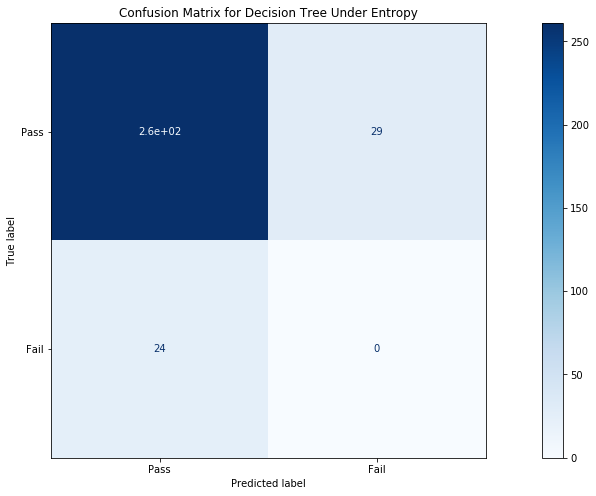

In [83]:
from sklearn.metrics import plot_confusion_matrix

fig, axs = plt.subplots(1, 1, squeeze=True, figsize=(20, 8))
conf_plot = plot_confusion_matrix(ent_clf, X_test_featurized, y_test, display_labels=labels, cmap=plt.cm.Blues, ax=axs);
conf_plot.ax_.set_title("Confusion Matrix for Decision Tree Under Entropy");

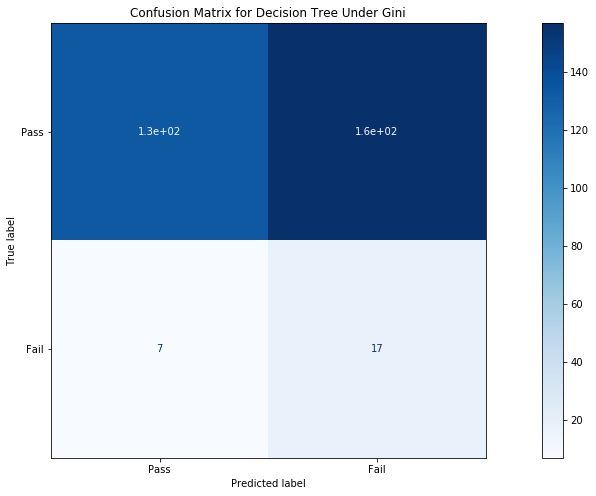

In [84]:
fig, axs = plt.subplots(1, 1, squeeze=True, figsize=(20, 8))
conf_plot = plot_confusion_matrix(gini_clf, X_test_featurized, y_test, display_labels=labels, cmap=plt.cm.Blues, ax=axs);
conf_plot.ax_.set_title("Confusion Matrix for Decision Tree Under Gini");

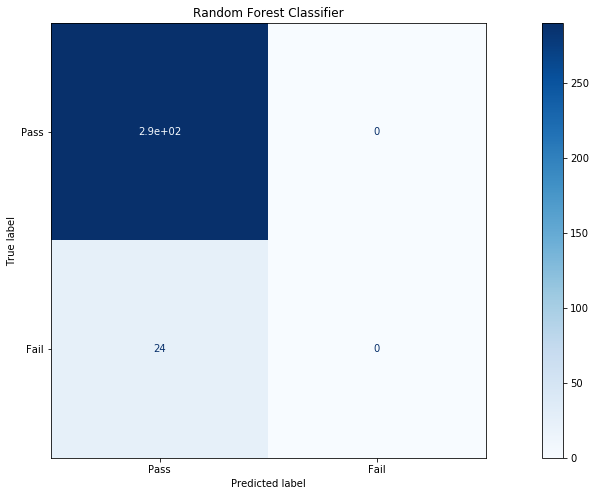

In [85]:
fig, axs = plt.subplots(1, 1, squeeze=True, figsize=(20, 8))
conf_plot = plot_confusion_matrix(rforest_clf, X_test_featurized, y_test, display_labels=labels, cmap=plt.cm.Blues, ax=axs);
conf_plot.ax_.set_title("Random Forest Classifier");

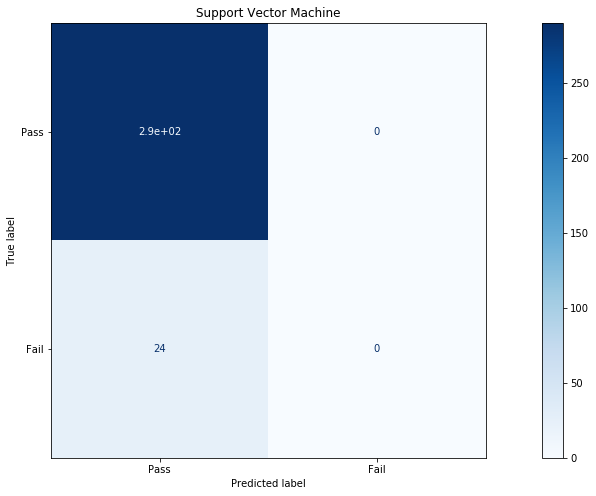

In [86]:
fig, axs = plt.subplots(1, 1, squeeze=True, figsize=(20, 8))
conf_plot = plot_confusion_matrix(svc_clf, X_test_featurized, y_test, display_labels=labels, cmap=plt.cm.Blues, ax=axs);
conf_plot.ax_.set_title("Support Vector Machine");

## Step 6: Describe your findings

In an effort to help SECOM manufacturing identify the most critical factors to predicting diapers that meet their quality standandards I've put together several models to assist. Initial findings did seem processing. Both the SVC and Random Forest models have accuracy scores around **93%**. However, they are only accurate for the Passes and not the Failures, which is problematic for our case. SECOM really wants to understand its defects which our most accurate models won't help them do. The team helping SECOM will need more time to investigate the issues with the findings. 